# A/B тестирование

В проекте представлены 2 части. В первой части на основе методологий ICE и RICE производится приоритезация гипотез по заранее оцененным параметрам Reach, Impact, Confidence, Efforts. Во второй части производится анализ A/B теста на основе месячных данных. В ходе работы над второй частью были проанализироны кумулятивные выручки, средние чеки и конверсии с целью определить, стоит ли продолжать или останавливать тестирование. 

<a id="0"></a>
### Содержание
[**Часть 1. Приоритезация гипотез**](#1)<br>
[Применение фреймворка ICE](#1.1)<br>
[Применение фреймворка RICE](#1.2)<br>
[**Часть 2. Анализ A/B-теста**](#2)<br>
[Анализ кумулятивной выручки по группам](#2.1)<br>
[Анализ кумулятивного среднего чека по группам](#2.2)<br>
[Изменение кумулятивного среднего чека группы B к группе A](#2.3)<br>
[Анализ количества заказов по пользователям на аномалии](#2.4)<br>
[Анализ стоимостей заказов на аномалии](#2.5)<br>
[Исследование конверсий в группах по "сырым" данным](#2.6)<br>
[Исследование различий в среднем чеке заказа между группами по "сырым" данным](#2.7)<br>
[Исследование конверсий в группах по "очищенным" данным](#2.8)<br>
[Исследование различий в среднем чеке заказа между группами по "очищенным" данным](#2.9)<br>
[Вывод](#2.10)<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import datetime
import datetime as dt


plt.style.use('ggplot')

starttime=datetime.datetime.now()

## Часть1. Приоритизация гипотез

In [2]:
data=pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

ICE=(Impact x Confidence) / Efforts

In [3]:
data['ICE']=data['Impact']*data['Confidence']/data['Efforts']
data.sort_values(by='ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


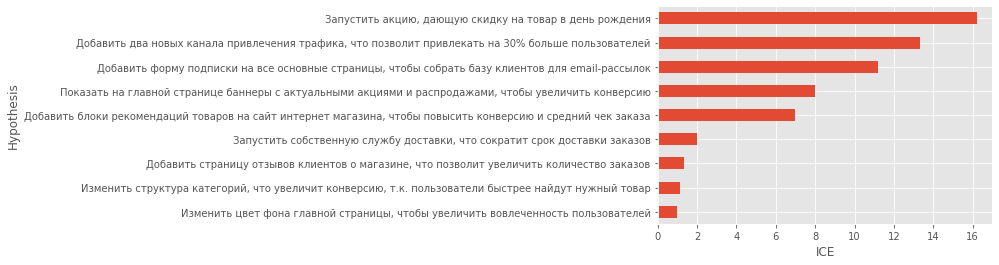

In [4]:
data.set_index('Hypothesis')['ICE'].sort_values().plot(kind='barh')
plt.xlabel('ICE')
plt.show()

Методология ICE показала, что гипотеза "Запустить акцию, дающуюу скидку на товар в день рождения" является наиболее приоритетной. 

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

RICE = (Reach x Impact x Confidence) / Efforts

In [5]:
data['RICE']=data['Reach']*data['Impact']*data['Confidence']/data['Efforts']
data.sort_values(by='RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


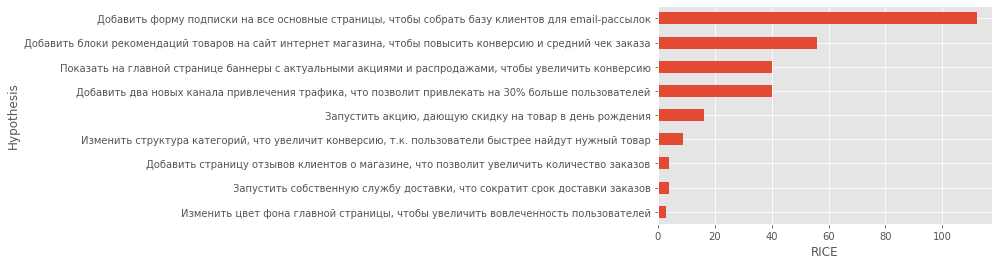

In [6]:
data.set_index('Hypothesis')['RICE'].sort_values().plot(kind='barh')
plt.xlabel('RICE')
plt.show()

После добавления нового параметра (Reach) приоритезация гипотез изменилась. Гипотеза "Запустить акцию, дающуюу скидку на товар в день рождения" получила столько же баллов, сколько и применительно к методологии ICE, потому что у нее охват оказался минимальным из всех (1 из 10). Так получилось скорее всего, что в течение проведения тестирования (например, 1 месяц) использовать эту акцию смогут только ограниченное количество пользователей (те, кто родился в этот месяц), да и не все пользователи могут узнать об этой акции. А проводить тестирование в течение года окажется очень затратным. <br>
Приоритет в случае RICE оказался у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", которой ICE дал 3 место, потому что у нее Impact и Confidence оказались ниже. 

## Часть 2. Анализ A/B-теста

#### Анализ кумулятивной выручки по группам

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


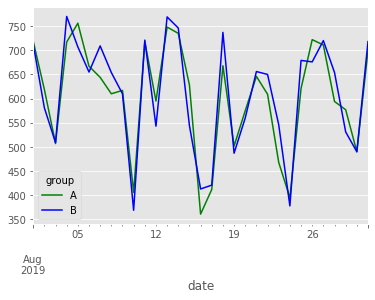

In [9]:
# Тест проходил в августе 2019, группы почти что оказались равномерными 50/50
visitors.pivot_table('visitors','date','group','sum').plot(color=['green','blue']);

In [10]:
# В датафрейме присутствуют дубликаты. Создадим новый датафрейм, в которых их нет. 
print(orders[['date','group']].duplicated().sum())
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

1135


,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [11]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [12]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated.head()


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [13]:

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


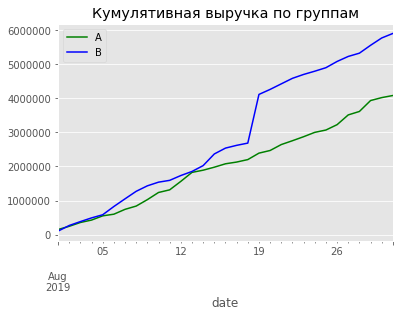

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

cumulativeRevenueA.set_index('date')['revenue'].plot(color='green')
cumulativeRevenueB.set_index('date')['revenue'].plot(color='blue')
plt.legend(['A','B'])
plt.title('Кумулятивная выручка по группам')
plt.show()


Примерно до 19 августа обе группы росли равномерно, однако в группе В видим далее резкий подъем, что может говорить об аномально дорогих заказов, сделанных в этот день, или об аномально большом количестве заказов. Разбираемся дальше. 

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Да, всё верно, скорее всего резкий подъем кумулятивной выручке группы B связан с крупным или несколькими крупными заказами.

Мoлодец, что не забыл добавить заголовок и подпись по оси x, но добавь, пожалуйста, подпись по оси y. Учти, пожалуйста, это и в других графиках.
</div>

#### Анализ кумулятивного среднего чека по группам

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.


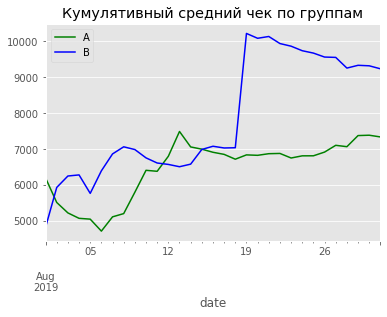

In [15]:
((cumulativeRevenueA.set_index('date')['revenue'])/(cumulativeRevenueA.set_index('date')['orders'])).plot(color='green')
((cumulativeRevenueB.set_index('date')['revenue'])/(cumulativeRevenueB.set_index('date')['orders'])).plot(color='blue')
plt.legend(['A','B'])
plt.title('Кумулятивный средний чек по группам')
plt.show()


Почти на всем промежутке времени средний чек группы B больше, чем группы А (за исключением нескольких дней в середине августа). Однако он не постоянен. Так, в группе А он стабилизируется только после 15 августа на уровне 7000, а до этого его амплитуда была 2000 рублей. В группе В наблюдаем резкий рост среднего чека 19 августа, что говорит о том, что в этот день сделали аномально дорогие заказы, далее средний чек в группе В падает. Так или иначе, в группе В нет установившегося среднего чека в течение месяца, поэтом необходимо больше данных. 

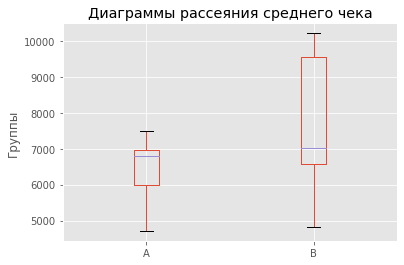

In [16]:
pd.concat([((cumulativeRevenueA.set_index('date')['revenue'])/(cumulativeRevenueA.set_index('date')['orders'])).to_frame('A'),
           ((cumulativeRevenueB.set_index('date')['revenue'])/(cumulativeRevenueB.set_index('date')['orders'])).to_frame('B')],axis=1).plot(kind='box')
plt.title('Диаграммы рассеяния среднего чека')
plt.ylabel('Рубли')
plt.ylabel('Группы')
plt.show()

Видим, что медианный средний чек почти не различаются у групп (на уровне 7000), тем не менее дисперсия в группе B значительно больше, чем в группе A. 

#### Изменение кумулятивного среднего чека группы B к группе A

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


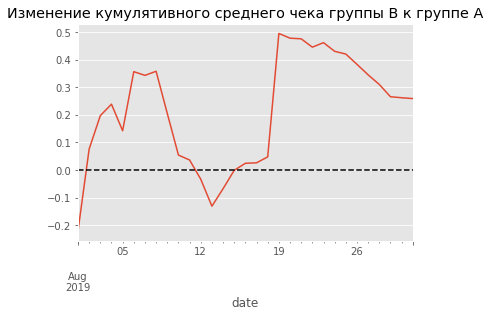

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']).set_index('date')

# cтроим отношение средних чеков
((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1).plot()
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Различия между кумулятивными средними чеками непостоянны, в начале и середине августа средний чек был больше в группе А, а другие периоды средний чек в группе В превышал средний чек в группе А в 1.3-1.5 раза. Также сохраняется "ступенька" в данных 19 августа.  

#### Анализ количества заказов по пользователям на аномалии

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


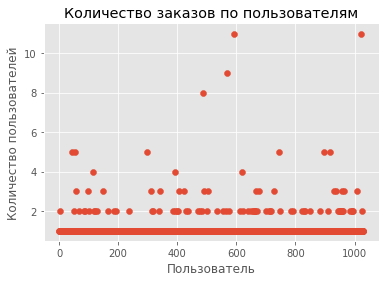

In [18]:
x_values = pd.Series(range(0,len(orders.pivot_table('transactionId','visitorId',aggfunc='nunique')['transactionId'])))
plt.scatter(x_values, orders.pivot_table('transactionId','visitorId',aggfunc='nunique')['transactionId'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Количество пользователей')
plt.show()

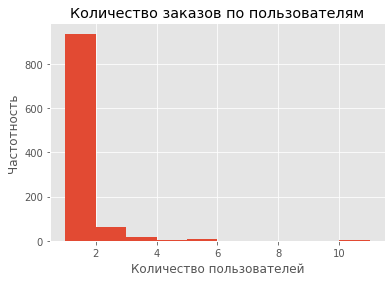

In [19]:
orders.pivot_table('transactionId','visitorId',aggfunc='nunique')['transactionId'].hist()
plt.title('Количество заказов по пользователям')
plt.ylabel('Частотность')
plt.xlabel('Количество пользователей')
plt.show()

В основном на одного пользователя приходится 1-2 заказа в месяц. 3 заказа в месяц сделали около 20 пользователей, 4 заказа - 3 пользователя, 5 заказов - 6 пользователей. Далее - единичные случаи, больше напоминающие аномалии. 

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.


In [20]:
print(np.percentile(orders.pivot_table('transactionId','visitorId',aggfunc='nunique')['transactionId'], [95, 99])) 


[2. 4.]


Не более 5% пользователей делали заказы более, чем 2 раз за месяц. Не более 1% пользователей делали 4 заказов в месяц. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Анализ стоимостей заказов на аномалии

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.


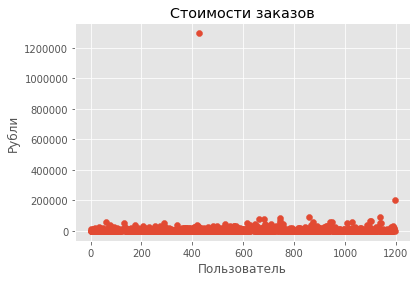

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимости заказов')
plt.xlabel('Пользователь')
plt.ylabel('Рубли')
plt.show()

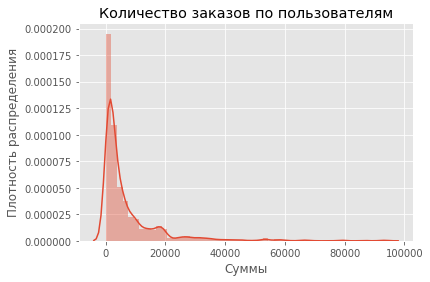

In [22]:
# Построим график плотности распределения, так как revenue - непрерывная переменная с ограничением в 200тыс
sns.distplot(orders[orders['revenue']<200000]['revenue'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Плотность распределения')
plt.xlabel('Суммы')
plt.show()

Из всего массива очень сильно выделяются 2 заказа (200 тыс и 1200 тыс), остальные находятся в пределе от 0 до 40000 (примерно)

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.


In [23]:
print(np.percentile(orders['revenue'], [95, 99])) 


[28000.  58233.2]


Только 5% заказов составляют больше 28 тыс рублей. На графике плотности распределения можно заметить, что после 20 тыс количество заказов свыше резко падает, поэтому имеет смысл поставить границы для аномальных случаев в размере 28 тыс. 

#### Исследование конверсий в группах по "сырым" данным

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.


Статистическая значимость различий в конверсии между группами по "сырым" данным - это без удаления аномальных явлений. 

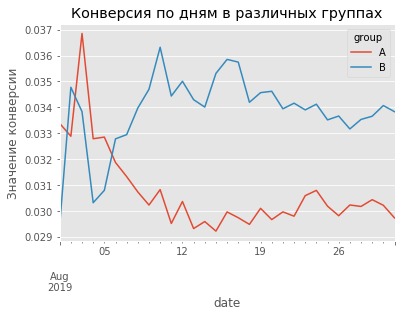

In [24]:
# Посмотрим конверсию по дням в различных группах
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.set_index(['date','group'])['conversion'].unstack().plot()
plt.title('Конверсия по дням в различных группах')
plt.ylabel('Значение конверсии')

plt.show()

In [25]:
cumulativeData.set_index(['date','group'])['conversion'].unstack().mean()

group
A    0.030728
B    0.033855
dtype: float64

Примерно с 10 августа конверсия в группе А стабилизруется на уровне 0.03, в группе В она непостоянна, но примерно с 5 августа всегда выше, чем в группе А. Проверим статистическую значимость различий конверсий. 

In [26]:
# Создадим агрегированный датафрейм
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [27]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

In [28]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Проведем тест Манна-Уитни. <br>
H0: Различия между конверсиями в группе А и B отсутствуют (Cr(A)=Cr(B))<br>
Н1: Различия присутствуют (Cr(A)!=Cr(B))<br>

In [29]:
# Более точные значения конверсий, чем были выше. 
print('Группа А',sampleA.mean())
print('Группа В',sampleB.mean())

Группа А 0.029728864218616567
Группа В 0.033833791499259885


In [30]:
results = st.mannwhitneyu(sampleA, sampleB)
alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
0.138


По "сырым" данным конверсия в группе B и конверсия в группе А различаются, а именно конверсия в группе B превышает конверсию в группе А на 13.8%. 

#### Исследование различий в среднем чеке заказа между группами по "сырым" данным

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проведем тест Манна-Уитни. <br>
H0: Различия между средними чеками в группах А и B отсутствуют <br>
Н1: Различия присутствуют <br>

In [31]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.259


Хоть и средний чек в группе B выше на 25.6% сделать вывод о различии среднего чека нельзя. 

#### Исследование конверсий в группах по "очищенным" данным


Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Выше мы определили, что аномальным можно считать количество заказов, совершенных одним пользователем больше 2 раз и дороже 28 тыс рублей. Выясним, сколько всего аномальных пользователей. 

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.shape) 
abnormalUsers.head()


(74,)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Всего 74 аномальных пользователя. 

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 



Проведем тест Манна-Уитни. <br>
H0: Различия между конверсиями в группе А и B отсутствуют (Cr(A)=Cr(B))<br>
Н1: Различия присутствуют (Cr(A)!=Cr(B))<br>

In [34]:
print('Группа А',sampleAFiltered.mean())
print('Группа В',sampleBFiltered.mean())

Группа А 0.02530765115034778
Группа В 0.029678308336424822


In [35]:
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значение:  0.006521296371518379
Отвергаем нулевую гипотезу: разница статистически значима
0.173


При удалении выбросов результат не поменялся, разница между конверсиями в группах А и В присутствует, только теперь конверсия в группе B выше на 17.3%. 

#### Исследование различий в среднем чеке заказа между группами по "очищенным" данным


Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проведем тест Манна-Уитни. <br>
H0: Различия между средними чеками в группах А и B отсутствуют <br>
Н1: Различия присутствуют <br>

In [36]:
results = st.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
alpha=0.05
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


p-значение:  0.3692408756572825
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
-0.020


После удаления аномальных результатов подтвердить различия между средними чеками в группах А и В не удалось. Также, теперь выяснилось, что средний в группе B на 2% меньше, чем в группе А. 

#### Вывод

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

После удаления выбросов, можно увидеть, как равномерно растет кумулятивная сумма по дням, однако в группе B она растет быстрее. Ранее мы видели "ступеньку" в данных, которая не позволяла нам сделать адекватных предположений по поводу того, какая группа является лучше. 

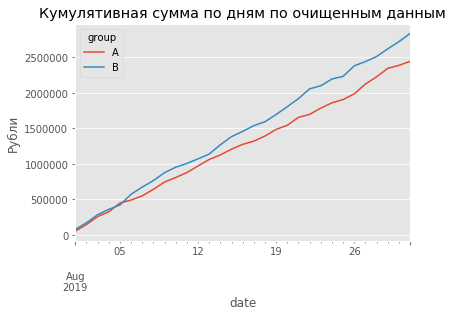

In [37]:
pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('revenue','date','group','sum').cumsum().plot()
plt.title('Кумулятивная сумма по дням по очищенным данным')
plt.ylabel('Рубли')
plt.show()

Тем не менее, тест на различие конверсий показал, что в любой ситуации (до удаления или после удаления выбросов) конверсия в группе В больше. Это можно увидеть и на графике по кумулятивному количеству покупателей после удаления выбросов. График группы В растет быстрее, чем в группе А. Различия уже появились на 6 дне. До этого группы росли одинаково.  

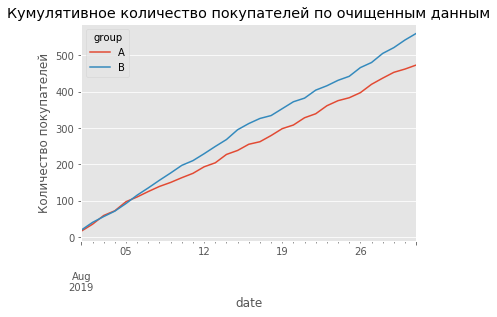

In [38]:
pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('transactionId','date','group','nunique').cumsum().plot()

plt.title('Кумулятивное количество покупателей по очищенным данным')
plt.ylabel('Количество покупателей')
plt.show()

Тем не менее, тест на различие средних чеков в очищенных данных показал, что чеки различаются, но в группе А он больше на 2%. По графику ниже можно увидеть, что средний чек в группе А стабилизировался на уровне 5тыс примерно 10 августа и почти не менялся. В группе B дисперсия также остается высокой, и сделать вывод о том, что средний чек в группе В больше сделать невозможно, несмотря на то, что были периоды, когда средний чек в группе А был значительно больше. 

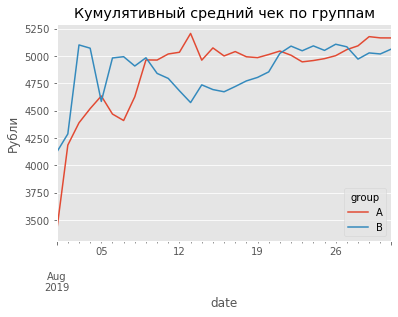

In [39]:
((pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('revenue','date','group','sum').cumsum())/(pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('transactionId','date','group','nunique').cumsum())).plot()
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Рубли')
plt.show()

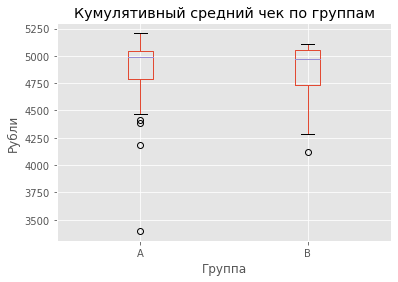

In [40]:
((pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('revenue','date','group','sum').cumsum())/(pd.concat([orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))],
orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]]).pivot_table('transactionId','date','group','nunique').cumsum())).plot(kind='box')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Рубли')
plt.xlabel('Группа')
plt.show()

Останавливать тест или нет нужно в том случае, если мы понимаем, какая бизнес-метрика для нас считается более важной: <br>
1. **Конверсия** значительно больше в группе B. После удаления выбросов различия в конверсиях только увеличилось (в группе В конверсия 17.3% больше в очищенных данных против 13.8% в сырых данных;
2. За счет большего привлечения покупателей **выручка** в группе В растет быстрее, потому что различие в конверсии больше, чем различие в среднем чеке;
3. **Средний чек** больше в группе А после удаления выбросов, но в группе В в очищенных данных большая дисперсия так и осталась, несмотря на то, что дни, когда средний чек в группе В оказался больше, чем группе А, было значительно больше. <br>
<br>
Даже если мы считаем, что средний чек для нас важнее конверсии, то останавливать тест нельзя, потому что для определения кумулятивного среднего чека в группе В нужно больше времени, а различие в 2% на данном этапе можно посчитать погрешностью. Если мы считаем, что конверсия для нас наиболее важный фактор, то А/В-тест можно остановить в пользу группы В.